# How can we add audio to the Gradio app?

We would like the ability to not only show people words and phrases in text, but also have it show how to pronounce the words.

## Step 1: We need audio

These computers should have an audio recording application called `Sound Recorder`.  
Use this application to create short audio files with the words that you are using in your app.
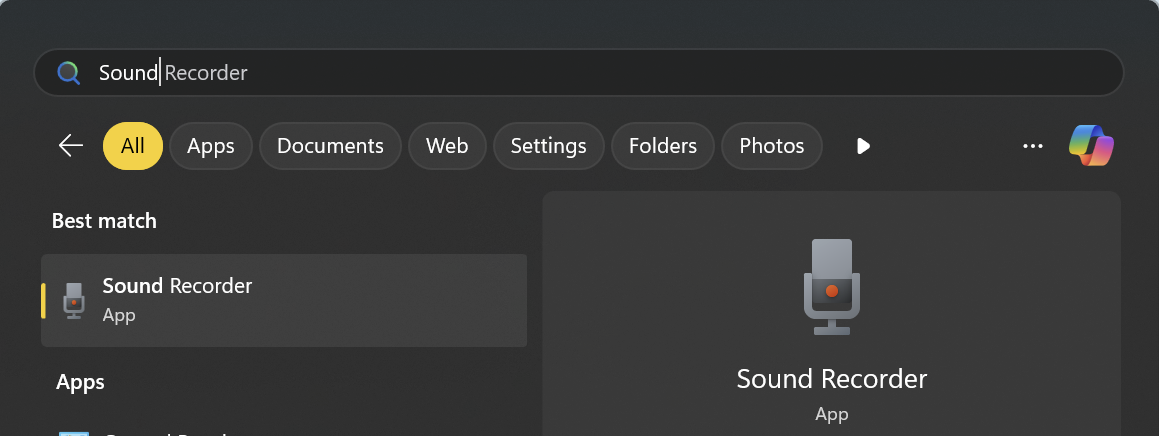

1. After recording the audio, rename the files to be the appropriate terms.
1. Create a folder called `audio_files` in our project through VS Code.  
    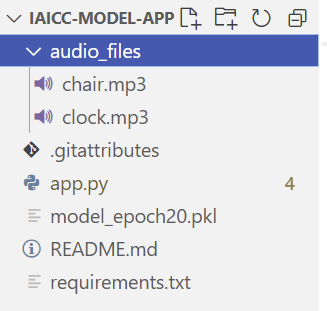
1. Drag/copy your audio files in the `audio_files` folder

## Step 2: Verifying/modifying the dictionary

The base code for `app.py` already has an element for the audio files, but you will want to double check that the text in the dictionary matches the file names.

```
name_map = {
    "blue": {
        "lakota": "Tho",  
        "audio": "audio_files/blue.wav"
        },
    # Add other categories similarly...
}
```

## Step 3: Modifying the Gradio.Block user interface

1. Add the the sound variable that will refer to an audio block  
`lakota_sound = gr.Audio(editable=False, show_share_button=False, show_download_button=False)`

1. Modify the audio_input change event to use the sound as an output.  
```
audio_input.change(fn=classify_audio,
			inputs=audio_input,
			outputs=[prediction_text, confidence_text, lakota_text, lakota_sound])
```

In [ ]:
# Build the Gradio app
with gr.Blocks() as demo:
	with gr.Row():
		gr.Markdown("## 🎤 Record Audio and Predict a Color")

	with gr.Row():
		audio_input = gr.Audio(type="numpy", label="Recorded Audio", elem_id="audio_input", sources=["microphone"], interactive=True)
	
	with gr.Row():
		with gr.Column(scale=2):
			record_button = gr.Button("🎙️ Record Audio")
		with gr.Column(scale=1):
			clear_button = gr.Button("Clear Recording")
	
	with gr.Row():
		with gr.Column(scale=1):
			prediction_text = gr.Textbox(label="Prediction", interactive=False)
		with gr.Column(scale=1):
			confidence_text = gr.Textbox(label="Confidence", interactive=False)
		with gr.Column(scale=1):
			lakota_text = gr.Textbox(label="Lakota", interactive=False)

	with gr.Row():
		# JS-based button for auto-recording and clearing recording
		record_button.click(fn=noop, js=record_js, outputs=[])
		clear_button.click(fn=noop, js=clear_js, outputs=[])
		lakota_sound = gr.Audio(editable=False, show_share_button=False, show_download_button=False)

	# Audio input triggers prediction
	audio_input.change(fn=classify_audio,
						 inputs=audio_input,
						 outputs=[prediction_text, confidence_text, lakota_text, lakota_sound])

demo.launch()

## Step 4: Modifying classify_audio function

Return that `audio_file` element from the `category_map` element that the model returned.  
  
    `return f"Predicted Category: {pred_class}", f"Confidence: {prob:.2%}", f"Lakota: {category_map[pred_class]['lakota']}", category_map[pred_class]['audio']`


In [ ]:
# Classification function
def classify_audio(audio):
	if audio is None:
		return "No audio provided", "", ""
	sample_rate, audio_data = audio
	image = audio_to_melspectrogram_image(audio_data, sample_rate)
	pred_class, pred_idx, probs = model.predict(image)
	prob = probs[pred_idx].item()
	return f"Predicted Category: {pred_class}", f"Confidence: {prob:.2%}", f"Lakota: {category_map[pred_class]['lakota']}", category_map[pred_class]['audio']
